# Деревья решений
Шестаков А.В., Панов А.И. Майнор по анализу данных 12/04/2016

In [2]:
import scipy as sp
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

Загрузите [данные](https://www.dropbox.com/s/3t1moa1wpflx2u9/california.dat?dl=0).

**Задание 1:** Найти оптимальную глубину дерева.<br/>
Разделите выборку на train-test в пропорции 70/30.<br/>
Обучите деревья с глубиной от `1` до `30`. Для каждой глубины расчитайте среднюю квадратичную ошибку на train и на test<br/>
Изобразите эти ошибки на одном графике, сделайте вывод по поводу оптимальной глубины дерева.

In [4]:
df = pd.read_csv('california.dat')
df.head()

,Longitude,Latitude,HousingMedianAge,TotalRooms,TotalBedrooms,Population,Households,MedianIncome,MedianHouseValue
0,-117.03,32.78,17,5481,1618,2957,1537,2.5707,171300
1,-118.23,33.80,26,239,135,165,112,1.3333,187500
2,-122.46,37.71,39,2076,482,1738,445,3.1958,232100
3,-122.06,37.94,19,4005,972,1896,893,2.5268,235700
4,-122.87,38.68,32,4073,718,2053,629,3.7352,228000


In [5]:
features = list(df.columns.values)
features.remove('MedianHouseValue')
features

['Longitude',
 'Latitude',
 'HousingMedianAge',
 'TotalRooms',
 'TotalBedrooms',
 'Population',
 'Households',
 'MedianIncome']

In [7]:
import sklearn as sk
from sklearn.cross_validation import train_test_split
a = sk.cross_validation.train_test_split(df, test_size = 0.3, train_size = 0.7)
print(np.shape(a[0]))
print(np.shape(a[1]))

(14447, 9)
(6192, 9)


In [8]:
target = a[0]['MedianHouseValue']
y_true = a[1]['MedianHouseValue']

In [9]:
del a[0]['MedianHouseValue']
del a[1]['MedianHouseValue']

In [10]:
import sklearn
from sklearn.metrics import mean_squared_error
MSE_train = []
MSE_test = []
for x in range(1, 31):
    from sklearn import tree
    clf = tree.DecisionTreeRegressor(max_depth=x)
    clf = clf.fit(a[0], target)
    
    y_pred = clf.predict(a[1])
    test = sklearn.metrics.mean_squared_error(y_true, y_pred)
    MSE_test.append(test)
    
    train_pred = clf.predict(a[0])
    train = sklearn.metrics.mean_squared_error(target, train_pred)
    MSE_train.append(train)

In [11]:
mse_test_df = pd.DataFrame(MSE_test)
mse_test_df.index = mse_test_df.index + 1
mse_test_df.index.name = 'Depth'
mse_test_df.columns = ['Mean squared error for test']

In [12]:
mse_train_df = pd.DataFrame(MSE_train)
mse_train_df.index = mse_train_df.index + 1
mse_train_df.index.name = 'Depth'
mse_train_df.columns = ['Mean squared error for train']

In [13]:
mse = pd.concat([mse_test_df, mse_train_df], axis=1)
mse

,Mean squared error for test,Mean squared error for train
Depth,,
1,9.124289e+09,9.227153e+09
2,7.389267e+09,7.382779e+09
3,6.813598e+09,6.726234e+09
4,5.917550e+09,5.918738e+09
5,5.396317e+09,5.354607e+09
6,4.874956e+09,4.757427e+09
7,4.277594e+09,3.879352e+09
8,3.922176e+09,3.249793e+09
9,3.919688e+09,2.709675e+09


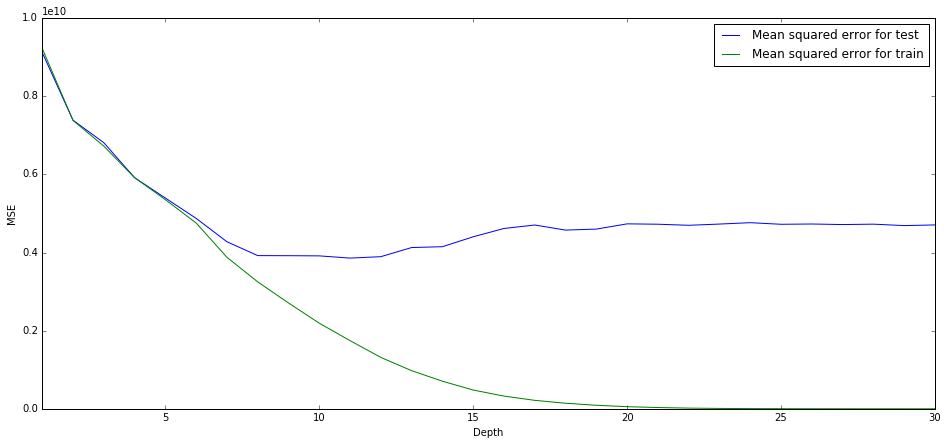

In [18]:
mse.plot(figsize=(16,7))
plt.ylabel('MSE')

In [15]:
# В порядке возрастания значений
mse_test_df['Mean squared error for test'].sort_values(0, ascending=True)

Depth
11    3.858252e+09
12    3.894815e+09
10    3.915253e+09
9     3.919688e+09
8     3.922176e+09
13    4.128263e+09
14    4.150227e+09
7     4.277594e+09
15    4.403744e+09
18    4.575140e+09
19    4.600661e+09
16    4.616807e+09
29    4.690152e+09
22    4.697941e+09
17    4.705539e+09
30    4.707507e+09
27    4.717017e+09
25    4.723971e+09
21    4.725520e+09
28    4.727196e+09
23    4.729549e+09
26    4.731140e+09
20    4.735023e+09
24    4.764869e+09
6     4.874956e+09
5     5.396317e+09
4     5.917550e+09
3     6.813598e+09
2     7.389267e+09
1     9.124289e+09
Name: Mean squared error for test, dtype: float64

In [16]:
mse_train_df['Mean squared error for train'].sort_values(0, ascending=True)

Depth
30    1.159558e+04
29    9.446711e+04
28    3.583253e+05
27    8.495587e+05
26    1.487914e+06
25    2.671050e+06
24    5.220730e+06
23    9.609852e+06
22    1.760334e+07
21    3.231784e+07
20    5.441975e+07
19    9.036607e+07
18    1.424232e+08
17    2.164439e+08
16    3.253611e+08
15    4.803313e+08
14    7.065479e+08
13    9.760306e+08
12    1.315377e+09
11    1.744787e+09
10    2.191507e+09
9     2.709675e+09
8     3.249793e+09
7     3.879352e+09
6     4.757427e+09
5     5.354607e+09
4     5.918738e+09
3     6.726234e+09
2     7.382779e+09
1     9.227153e+09
Name: Mean squared error for train, dtype: float64

Глядя исключительно на график, можно сказать, что значение оптимальной глубины для тестовой выборки лежит в границах от 5 до 15, поскольку на этом отрезке достигается локальный минимум. Отсортировав значения MSE в порядке возрастания, можем найти оптимальную глубину (на отрезке от 1 до 30), которая равна 11. <br/> <br/> 
Относительно обучающей выборки можно сказать, что чем больше глубина, тем меньше ошибка (что соответствует правде, ведь, "углубляясь", модель с каждым разом делит более точно, увеличивая количество классов).

**Задание 2:** Выведите важности признаков. Для этого воспользуйтесь `DecisionTreeRegressor.feature_importances_`

In [100]:
importances = clf.feature_importances_
importances

array([ 0.16884155,  0.16916194,  0.06224544,  0.02370916,  0.02171257,
        0.029224  ,  0.01778158,  0.50732375])

In [118]:
imp = pd.DataFrame(importances)
imp.index = features
imp.index.name = 'Features'
imp.columns = ['Importances']
imp


,Importances
Features,
Longitude,0.168842
Latitude,0.169162
HousingMedianAge,0.062245
TotalRooms,0.023709
TotalBedrooms,0.021713
Population,0.029224
Households,0.017782
MedianIncome,0.507324


In [119]:
# В порядке убывания значений
imp['Importances'].sort_values(0, ascending=False)

Features
MedianIncome        0.507324
Latitude            0.169162
Longitude           0.168842
HousingMedianAge    0.062245
Population          0.029224
TotalRooms          0.023709
TotalBedrooms       0.021713
Households          0.017782
Name: Importances, dtype: float64

**Задание 3:** Поразмышляйте на темы:
* Обработки пропусков в данных.
* Как сделать разделяющие плоскости непараллельные осям?

**Обработка пропусков данных** <br/><br/>
Зачастую в предложенных данных могут отсутствовать какие-либо значения (по причине отсутсвия записи о значении признака или по любой другой). Однако, если удалять все строки, содержащие пропуски, может сильно сократиться выборка, вследствие чего построенная на подобных данных модель будет недостаточно точно предсказывать значения (по параметру target). Поэтому необходимо каким-то образом заменять пропуски данных. Для этого используют следующие методы:
* Заменять наиболее вероятным (в случае непрерывных данных замена производится на среднее значение из наиболее вероятного интервала, число интервалов варьируется в зависимости от объема выборки – чем она больше, тем больше интервалов; в дискретном случае – выбирается значение с наибольшей вероятностью) <br/><br/>
* Заменять случайными значениями<br/><br/>
* Заменять средним (производится замена пропусков на случайное значение из распределения, параметры которого оцениваются из имеющихся значений в столбце)<br/><br/>
* Заменять медианой<br/><br/>
* Заменять значением "Не задано" (только для дискретных величин) <br/><br/>

P.S.: поскольку самостоятельно я придумала только три метода из предложенных (случайное значение из заданного интервала, среднее, медиана), я решила почитать статьи в Интернете на данную тему. В связи с этим остальные методы взяты из данного [источника](https://basegroup.ru/deductor/function/algorithm/filling-gaps) (и неудивительно, что мои методы входят в этот список).
<br/><br/>
Относительно функций, которые можно использовать при замене missing data, хорошо написано на сайте [pandas](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). Я решила, что копипастить просто не честно.

**Как сделать разделяющие плоскости непараллельные осям?** <br/><br/>


Для этого можно использовать другие критерии разделения помимо "решающего пня" (при таком способе деления объектов в узлах в большинстве случаев деревья получаются значительно большей высоты и требуется гораздо большее их число для достижения сравнимого качества, чем в случае с произвольно ориентированными линейными (а тем более нелинейными) разделяющими поверхностями), например:
* линейный ориентированный критерий: <br/><br/>
$C_2(x, w, τ ) = [xw <= τ ]$ <br/><br/>
* нелинейный критерий второго порядка: <br/><br/>
$C_3(x, w, W, τ ) = [xW x^T + xw <= τ ]$ <br/><br/>

[Рыжков, 2015](http://www.machinelearning.ru/wiki/images/d/d8/2015_517_RyzhkovAM.pdf)